<h1><center>Identification of Cardiovascular Health Among
Men and Women</center></h1>

**Abstract:** Globally, Cardiovascular diseases are the leading causes of death. In the United States, about 697,000 people died from heart disease in 2020. That is 1 in every 5 deaths.  Compared to men, there is a dearth of information on the prevalence of risk factors and their relationships to incident cardiovascular disease in women. Medical conditions like high blood cholesterol and high blood sugar levels can put people at higher risk of developing cardiovascular diseases (CVD). In this project, we would like to analyze how factors like age, sex, chest pain types, and metabolic factors, such as cholesterol and blood sugar, affect the development of Heart Disease (HD). 

**About The Data:** The data was published by the UCI Machine Learning Database. From the time of publication, the Cleveland database was the only dataset in its time (1988) that has been used by ML researchers of its kind. The goal for publication was to identify the presence of heart disease in a patient. The researchers labeled a patient on an ordinal scale, ranging values from 0 (no presence) to 4. Previous Experiments concentrated specifically on binary classification, distinguishing presence (values 1,2,3,4) from absence (value 0). Our Team attempts to make these distinctions and identify the presence of heart disease. 

The data within the UCI Machine Learning Repository has a directory containing 4 databases concerning heart disease diagnosis. All attributes are numeric-valued, which will need to be recoded later in time. The data was collected from the four following locations:

 1. Cleveland Clinic Foundation (cleveland.data)
 2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
 3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
 4. University Hospital, Zurich, Switzerland (switzerland.data)


After exploring the data, as well as review relevant infromation, our team have came up with the followng research questions:
1. Are there any differentiating metabolic risk factors (cholesterol, blood sugar) between sexes that could classify whether a patient has Heart Disease?
2. Does age factor into the probability of developing Heart Disease among sexes?
3. What is the probability that chest pain types are a leading factor in developing Heart Disease? Can specific chest pain types classify if a patient has Heart Disease and how accurately?

Import associated packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn import metrics, set_config
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

<h2><center>Analysis of Factors Affecting Cardiovascular Health Among
Men and Women</center></h2>

## KNN vs Logistic - showing if there is a better way to classify the data using hyperparameter tuning Grid Search

In this portion of the project, we will explore if using a KNN model would yield better results than a logistic model. In this portion, we will begin by attempting to classify each of the five class labels. Then, we will further generalize on our model into two classed (i.e. No Presence vs Presence). This will give us more insight which may deduce the better model of choice 

The idea is to create a pipeline, fed into a grid search to reveal the best parameters for both logistic and KNN models. As previously identified, we will use this part of the project to continue to explore our research questions 

The data will be re-read for simplicity, as we have planed to re-augment the data. 

### Multiclass classification

In [2]:
#load and relabel column names
columnNames = ['age','sex','chest_pain_type','restbps','chol','blood_sugar','restecg','max_heart_rate','exang','oldpeak','slope','num_mjr_vess','thal','dx_num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',names=columnNames)

In [3]:
# remove nulls
df = df.replace('?', np.nan)

In [4]:
#re-encode the dataframe columns to their proper data type
df[['thal', 'sex', 'chest_pain_type', 'restecg', 'exang', 'slope','dx_num', 'blood_sugar']] = df[['thal','sex', 'chest_pain_type', 'restecg', 'exang', 'slope','dx_num', 'blood_sugar']].astype(str)
df['num_mjr_vess'] = df['num_mjr_vess'].astype(float)

In [5]:
#split data appropriatley 
y = df['dx_num']
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=85)

In [6]:
# return column names as string within a list - this is used for 
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
catergorical_cols = X_train.select_dtypes(include=object).columns.tolist()
cols = catergorical_cols + numeric_cols
X_train = X_train[cols]
X_test = X_test[cols]

In [7]:
# Build out pipelines for preprocessing

preprocess_cat =  make_pipeline(
                  SimpleImputer(),
                  OneHotEncoder(sparse=False)
                  )

preprocess_num =  make_pipeline(
                  SimpleImputer(),
                  StandardScaler()
                  )

In [8]:
# combine pipelines from above to transform columns when modeling

preprocess_data = make_column_transformer(
    (preprocess_cat, catergorical_cols),
    (preprocess_num, numeric_cols),
    remainder='passthrough'
    )


#### K Nearest Neighbors

In [9]:
# Create model. As of now, we will not include any parameters, as mentioned in the problem statement, 
# that will be included in the GridSearch 
knn = KNeighborsClassifier()
pipe_model = make_pipeline(preprocess_data, knn)

In [10]:
set_config(display="diagram")
pipe_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'blood_sugar', 'restecg',
                                                   'exang', 'slope', 'thal']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'restbps', 'chol',
                                                   'max_heart_rate', 'oldpeak',
                                                   'num_mjr_vess'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [112]:
# For ease of display, we chose not to include parameter results 
# used to return parameters for GS 
# pipe_model.get_params()

In [11]:
# get knn_model paramters
knn_parameters = {
    "kneighborsclassifier__n_neighbors" : [1,3,5,7,9],
    "kneighborsclassifier__weights" : ["uniform", "distance"],
    "kneighborsclassifier__metric": ["manhattan", "euclidean", "minkowski"],
    "kneighborsclassifier__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "kneighborsclassifier__leaf_size": range(1,50,5)
}


In [12]:
# fit to model. CV is small due to imbalances in class sizes. 
gs = GridSearchCV(
                  estimator  =  pipe_model, 
                  param_grid =  knn_parameters, 
                  cv         =  5, 
                  scoring    =  'accuracy',
                  n_jobs     =  -1)

In [13]:
# run algorithm, we WILL receive bad results - assuming because of imbalances in class sizes. 
grid_res = gs.fit(X_train, y_train)

C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [14]:
# return results for best params. These will be used in the next cell
grid_res.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 1,
 'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [15]:
# fit our knn model
knn_final_model = KNeighborsClassifier(
    n_neighbors = 1,
    algorithm = 'auto',
    leaf_size = 1,
    metric = 'manhattan',
    weights = 'uniform'
)

In [16]:
# create a pipeline with preprocessing and knn model
pipe_model = make_pipeline(preprocess_data, knn_final_model)
pipe_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'blood_sugar', 'restecg',
                                                   'exang', 'slope', 'thal']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'restbps', 'chol',
                                                   'max_heart_rate', 'oldpeak',
                                                   'num_mjr_vess'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, metric='manhattan',
                                      n_neighbors=1))])

In [17]:
# lest now check how well our multiclass model is 
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred, zero_division= 1))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        44
           1       0.22      0.33      0.26        15
           2       0.20      0.14      0.17        14
           3       0.38      0.25      0.30        12
           4       0.33      0.17      0.22         6

    accuracy                           0.52        91
   macro avg       0.38      0.34      0.35        91
weighted avg       0.51      0.52      0.51        91



It looks like the model does not have very strong prediction power. By looking at the results, the model has a very hard time distinguishing the different classes from one another. 

#### Logistic Regression

In [19]:
logit=LogisticRegression()
pipe_model = make_pipeline(preprocess_data, logit)
pipe_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['sex', 'chest_pain_type',
                                                   'blood_sugar', 'restecg',
                                                   'exang', 'slope', 'thal']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'restbps', 'chol',
                                                   'max_heart_rate', 'oldpeak',
                                                   'num_mjr_vess'])])),
                ('logisticregression', LogisticRegression())])

In [20]:
logit=LogisticRegression()
pipe_model = make_pipeline(preprocess_data, logit)
#pipe_model.get_params()

In [21]:
# Rerun GS with Logit regression 

logit_parameters = {
                    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    'logisticregression__penalty':['none', 'elasticnet', 'l1', 'l2'],
                    'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100]
                   }

gs = GridSearchCV(
                  estimator  =  pipe_model, 
                  param_grid =  logit_parameters, 
                  cv         =  5, 
                  scoring    =  'accuracy',
                  n_jobs     =  -1)

In [22]:
grid_res = gs.fit(X_train, y_train)

C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1

In [23]:
# return results for best params. These will be used in the next cell
grid_res.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'newton-cg'}

In [24]:
#fit best model 
final_model = LogisticRegression(
    penalty='none',
    C=0.001,
    solver='newton-cg'
)

In [25]:
pipe_model = make_pipeline(preprocess_data, final_model)
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division= 1))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.15      0.20      0.17        15
           2       0.20      0.07      0.11        14
           3       0.26      0.42      0.32        12
           4       0.00      0.00      0.00         6

    accuracy                           0.52        91
   macro avg       0.29      0.31      0.29        91
weighted avg       0.50      0.52      0.50        91



C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


It looks like the logistic model has similar results to the KNN model. There are some noticeable differences between the class predictions which should be recognized, which will help us in our binary classification  

### Binary classification

We can encapsulate more code in cells, as it is just a repeated task from earlier. Perhaps this time, we will increase our cv to create more folds in our data. Perhaps it will give us different results.

#### K Nearest Neighbors 

In [26]:
#split data appropriatley, this time binning the y labels into two classes
df['dx_num'] = df['dx_num'].replace(['1','2','3','4'], '1')
y = df['dx_num']
X = df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=85)

In [27]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
catergorical_cols = X_train.select_dtypes(include=object).columns.tolist()
cols = catergorical_cols + numeric_cols
X_train = X_train[cols]
X_test = X_test[cols]


preprocess_data = make_column_transformer(
    (preprocess_cat, catergorical_cols),
    (preprocess_num, numeric_cols),
    )


In [28]:
# We can increase our cv to 10, as we now have less imbalances in our labels
pipe_model = make_pipeline(preprocess_data, knn)
gs = GridSearchCV(
                  estimator  =  pipe_model, 
                  param_grid =  knn_parameters, 
                  cv         =  10, 
                  scoring    =  'accuracy',
                  n_jobs     =  -1)

grid_res = gs.fit(X_train, y_train)

C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [29]:
# return results for best params. These will be used in the next cell
grid_res.best_params_

{'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 1,
 'kneighborsclassifier__metric': 'manhattan',
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [30]:
knn_final_model = KNeighborsClassifier(
    n_neighbors = 1,
    algorithm = 'auto',
    leaf_size = 1,
    metric = 'manhattan',
    weights = 'uniform'
)

pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division= 1))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        44
           1       0.88      0.79      0.83        47

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.83        91



The model has significantly has better resuls and shows promise. We can concur binary classification does much better than multiclass

In [31]:
logit=LogisticRegression()
pipe_model = make_pipeline(preprocess_data, logit)
logit_parameters = {
                    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                    'logisticregression__penalty':['none', 'elasticnet', 'l1', 'l2'],
                    'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100]
                   }

gs = GridSearchCV(
                  estimator  =  pipe_model, 
                  param_grid =  logit_parameters, 
                  cv         =  10, 
                  scoring    =  'accuracy',
                  n_jobs     =  -1)

grid_res = gs.fit(X_train, y_train)

C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 

In [32]:
grid_res.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__penalty': 'none',
 'logisticregression__solver': 'newton-cg'}

In [33]:
#fit best model 
final_model = LogisticRegression(
    penalty='none',
    C=0.001,
    solver='newton-cg'
)

In [34]:
pipe_model = make_pipeline(preprocess_data, final_model)
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division= 1))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.87      0.85      0.86        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



C:\Users\ali\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Based on the results above, there is evidence to suggest the **logistic model was a better classifier than the KNN model in Binary classification!**

We can consider the how much influence a given parameter is to consider the magnitude of its coefficients. 

In [50]:
# return the features and coefficients for feature importance
logit_model_coef = np.ndarray.tolist(pipe_model[-1].coef_)
logit_model_coef = [item for sublist in logit_model_coef for item in sublist]
features = np.ndarray.tolist(pipe_model[:-1].get_feature_names_out())
features = [s.replace('pipeline-1__', '') for s in features]
features = [s.replace('pipeline-2__', '') for s in features]
features = [s.replace('thal_4.6635071090047395', 'thal_4.0 (imputed)') for s in features]

In [51]:
coefs = pd.DataFrame(
    logit_model_coef,
    columns=["Coefficients"],
    index=features
)

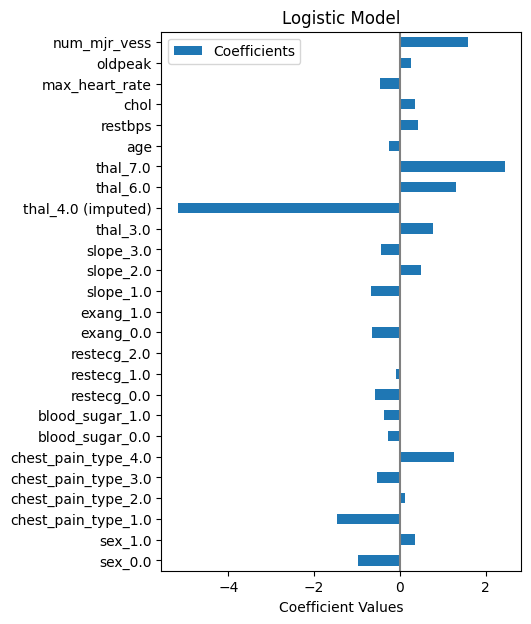

In [52]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Logistic Model")
plt.axvline(x=0, color="0.5")
plt.xlabel("Coefficient Values")
plt.subplots_adjust(left=0.5)

In [46]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
nan      2
Name: thal, dtype: int64